In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("../input/salarykz"))
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

['salary_train.csv', 'salary_example_submition.csv', 'salary_predict.csv']


In [2]:
train=pd.read_csv("../input/salarykz/salary_train.csv")
test=pd.read_csv("../input/salarykz/salary_predict.csv")
submission_demo=pd.read_csv("../input/salarykz/salary_example_submition.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            9000 non-null   int64 
 1   algebra       9000 non-null   int64 
 2   programming   9000 non-null   int64 
 3   data science  9000 non-null   int64 
 4   robotics      9000 non-null   int64 
 5   economics     9000 non-null   int64 
 6   job           9000 non-null   object
 7   salary        9000 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 562.6+ KB


In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,9000.0,4499.500000,2598.220545,0.0,2249.75,4499.5,6749.25,8999.0
algebra,9000.0,74.485556,14.470835,50.0,62.00,74.0,87.00,99.0
programming,9000.0,74.500111,14.489513,50.0,62.00,74.0,87.00,99.0
data science,9000.0,74.349889,14.340312,50.0,62.00,75.0,87.00,99.0
robotics,9000.0,74.445444,14.362890,50.0,62.00,74.0,87.00,99.0
economics,9000.0,74.620556,14.402834,50.0,62.00,75.0,87.00,99.0
salary,9000.0,519763.333333,280505.076008,90000.0,300000.00,460000.0,760000.00,1350000.0


In [5]:
train[train.salary>700000]['job'].value_counts()

robotics engineer    1496
data scientist       1022
senior developer       23
Name: job, dtype: int64

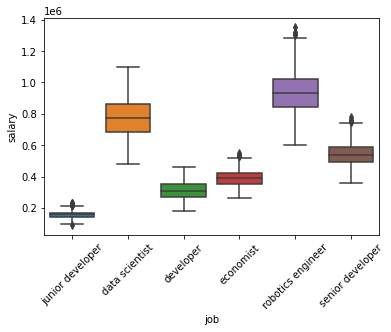

In [6]:
ax=sns.boxplot(x="job", y="salary", data=train)
ax.tick_params(axis='x', rotation=45)

In [7]:
bins = [90000, 180000, 270000, 360000, 450000, 540000, 630000,720000,810000,900000,990000,1080000,1170000,1260000,1350000]
train['binned'] = pd.cut(train['salary'], bins)

In [8]:
def bines(x):
    if x<=180000:
        return 135000
    elif x>180000 and x<=270000:
        return 225000
    elif x>270000 and x<=360000:
        return 315000
    elif x>360000 and x<=450000:
        return 405000
    elif x>450000 and x<=540000:
        return 495000
    elif x>540000 and x<=630000:
        return 585000
    elif x>630000 and x<=720000:
        return 675000
    elif x>720000 and x<=810000:
        return 765000
    elif x>810000 and x<=900000:
        return 855000
    elif x>900000 and x<=990000:
        return 945000
    elif x>990000 and x<=1080000:
        return 1035000
    elif x>1080000 and x<=1170000:
        return 1125000
    elif x>1170000 and x<=1260000:
        return 1215000
    else:
        return 1305000
train['label']=train['salary'].apply(bines)

In [9]:
train.job.unique()

array(['junior developer', 'data scientist', 'developer', 'economist',
       'robotics engineer', 'senior developer'], dtype=object)

In [10]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(train[['job']]).toarray())
train_final = train.join(encoder_df)

encoder_df_2=pd.DataFrame(encoder.fit_transform(test[['job']]).toarray())
test_final = test.join(encoder_df_2)

y=train_final['label']
X=train_final[['algebra','programming','data science','robotics','economics',0,1,2,3,4,5]]

In [11]:
test_final.drop(['Id','job','salary'],axis=1,inplace=True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


X_final_test=sc_X.transform(test_final)
                            
classifier = DecisionTreeClassifier(random_state=0)
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.5377777777777778


In [13]:
from sklearn.ensemble import RandomForestClassifier
clf_2 = RandomForestClassifier(max_depth=10, random_state=0)
clf_2.fit(X_train, y_train)
y_pred = clf_2.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.5933333333333334


In [14]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.3438888888888889


In [15]:
from sklearn import svm
clf_3 = svm.SVC()
clf_3.fit(X_train, y_train)
y_pred = clf_3.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.5933333333333334


In [16]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))


Accuracy Score: 0.5861111111111111


In [17]:
y_pred = clf_2.predict(X_final_test)

In [18]:
test['salary']=y_pred

In [19]:
submit=test[['Id','salary']]

In [20]:
submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      1000 non-null   int64
 1   salary  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [21]:
submit.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1000.0,9499.5,288.819436,9000.0,9249.75,9499.5,9749.25,9999.0
salary,1000.0,509490.0,275736.051815,135000.0,315000.00,405000.0,765000.00,1125000.0


In [22]:
submit.to_csv('submission.csv', index=False)